# #1 查询自己使用的Python版本
 
在有些系统中，`python`是`python2.x`的别名，而`python3`是`python3.x`的别名。可以用`--version`查找所使用的具体Python版本。
```sh
$ python --version
Python 3.8.5
```

在执行Python代码的过程中，可以通过内置的`sys`模块查询Python版本：
```python
>>> import sys
>>> print(sys.version_info)
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
>>> print(sys.version)
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
```

Python2 于2020年1月1日停止维护，因此建议大家都转换到Python3来。


# #2 遵循PEP8 风格指南

Python Enhancement Proposal #8 叫作PEP8，是一份针对Python代码格式而编写的风格指南。大家都采用一致的风格可以让代码可读性更好。大家应该把完整[指南](https://www.python.org/dev/peps/pep-0008/)阅读一遍。
如果你没有阅读完整版，那么下面几条要绝对遵守。

## 与空白有关的建议

在Python中，空白(空白符，空格或制表符等)在语法上相当重要。大家应该遵循以下几条建议：
* 用空格(space)表示缩进，而不要使用制表符(Tab)
* 和语法相关的每一层缩进都用4个空格表示
* 每行不超过79个字符
    * 在PyCharm中，我们只要代码不超过这条线即可：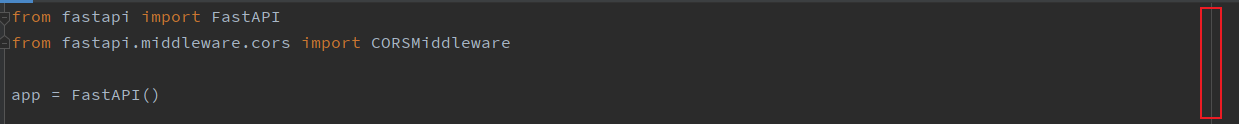
* 对于占据多行的长表达式来说，除了首行之外的其余各行都应该在通常的缩进级别之上再加4个空格
* 在同一份文件中，函数与类之间用两个空行隔开
* 在同一个类中，方法与方法用一个空行隔开
* 使用字典时，键与冒号之间不加空格，写在同一行的冒号和值之间应该加一个空格
* 给变量赋值时，赋值符号的左边和右边各加一个空格，并且只加一个空格就好
* 给变量的类型做注解时，不要把变量名和冒号隔开，但在类型信息前应该有一个空格

## 与命名有关的建议

PEP8 建议采用不同的方式来给Python代码中的各个部分命名，这样在阅读代码时，就可以根据这些名称看出它们的角色。遵守以下建议：
* 函数、变量及属性用小写字母来拼写，各单词之间用下划线相连，例如：`lowercase_undersoce`
* 受保护的实例属性，用一个下划线开头，例如： `_leading_underscore`
* 私有的实例属性，用两个下划线开头，例如：`__double_leading_underscore`
* 类(包括异常)命名时，每个单词的首字母均大写，例如：`CapitalizedWord`
* 模块级别的常量，所有字母都大写，各单词之间用下划线相连，例如：`ALL_CAPS`
* 类中的实例方法，应该把第一个参数命名为`self`，用来表示该对象本身
* 类方法的第一个参数，应该命名为`cls`，用来表示这个类本身

## 与表达式和语句有关的建议
* 采用行内否定，即把否定词直接写在要否定的内容前面，而不要放在整个表达式的前面，例如应该写`if a is not b`，而不是`if not a is b`
* 不要通过长度判断容器或序列是不是空的，例如不要通过`if len(somelist) == 0`判断`somelist`是否为`[]`或`''`等空值，而是应该采用`if not somelist`这样的写法来判断，因为Python会把空值自动评估为`False`
* 如果要判断容器或序列里有没有内容，也不要通过长度来判断，而是应该采用`if somelist`语句，因为Python会把非空的值自动判断为`True`
* 不要把`if`语句、`for`循环、`while`循环及`except`复合语句挤在一行。应该把这些语句分成多行来写，这样更清晰
* 如果表达式一行写不下，可以用括号将其括起来，而且要适当地添加换行与缩进以便于阅读
* 多行的表达式，应该用括号括起来，而不要用`\`符号续行

## 与引入有关的建议
* `import`语句总是应该放在文件开头
* 引入模块时，总是应该使用绝对名称，而不应该根据当前模块路径来使用相对名称。例如，要引入`bar`包中的`foo`模块，应该完整地写出`from bar import foo`，即便当前路径为`bar`包里，也不应该简写为`import foo`
* 如果一定要用相对名称来编写`import`语句，那就应该明确地写成：`from . import foo`
* 文件中的`import`语句应该按顺序分成三个部分：首先引入标准库里的模块，然后引入第三方模块，最后引入自己的模块。属于同一个部分的`import`语句按字母顺序排列。


# #3 了解bytes与str的区别

Python有两种类型可以表示字符序列：`bytes`和`str`。`bytes`实例包含的是原始数据，即8位的无符号值。

In [1]:
a = b'h\x65llo'
print(list(a)) # [104, 101, 108, 108, 111]
print(a) # b'hello'

[104, 101, 108, 108, 111]
b'hello'


`str`实例包含的是Unicode码点，这些码点与人类语言之中的文本字符相对应。

In [2]:
a = 'a\u0300 propos'
print(list(a)) # ['a', '̀', ' ', 'p', 'r', 'o', 'p', 'o', 's']
print(a) # à propos

['a', '̀', ' ', 'p', 'r', 'o', 'p', 'o', 's']
à propos


`str`实例不一定非要用某种固定的方案编码成二进制数据，`bytes`实例也不一定非要按照某一种固定的方案解码成字符串。要把Unicode数据转换成二进制数据，必须调用`str`的`encode`方法。要把二进制数据转换成Unicode数据，必须调用`bytes`的`decode`方法。调用这些方法的时候，可以明确指出使用的编码方案。

编写Python程序的时候，一定要把解码和编码操作放在最外层来做，让程序的核心部分可以使用Unicode数据来运作，这种办法通常叫做Unicode三明治。
程序的核心部分，应该用`str`类型来表示Unicode数据，并且不要锁定到某种字符编码上面。这样可以让程序接受许多种文本编码，并把它们都转换成Unicode。

两种不同的字符类型与Python中两种常见的使用情况相对应：
* 开发者需要操作原始的8位值序列，序列里面的这些8位值合起来表示一个应该按UTF-8或其他标准编码的字符串
* 开发者需要操作通用的Unicode字符串，而不是操作某种特定编码的字符串
我们通常需要编写两个辅助函数，以便在这两种情况之间转换，确保输入值类型符合开发者的预期形式。

第一个辅助函数接受`bytes`或`str`实例，并返回`str`：

In [3]:
def to_str(bytes_or_str):
    if isinstance(bytes_or_str, bytes):
        value = bytes_or_str.decode('utf-8') # to str
    else:
        value = bytes_or_str
    return value

print(repr(to_str(b'foo'))) # 'foo'
print(repr(to_str('bar'))) # 'bar'

'foo'
'bar'


第二个辅助函数也接受`bytes`或`str`实例，但它返回的是`bytes`：

In [4]:
def to_bytes(bytes_or_str):
    if isinstance(bytes_or_str, str):
        value = bytes_or_str.encode('utf-8') # to bytes
    else:
        value = bytes_or_str
    return value 

print(repr(to_str(b'foo'))) # 'foo'
print(repr(to_str('bar'))) # 'bar'

'foo'
'bar'


使用原始的8位值与Unicode字符串时，有两个问题要注意。
第一个问题是，`bytes`与`str`这两种类型似乎以相同的方式工作，但其实例并不互相兼容，所以在传递字符序列的时候必须考虑好其类型。

可以用`+`操作符将`bytes`添加到`bytes`，`str`也是如此。

In [5]:
print(b'one' + b'two') # b'onetwo'
print('one' + 'two')  # onetwo

b'onetwo'
onetwo


但是不能将`str`实例添加到`bytes`实例：

In [6]:
b'one' + 'two'

TypeError: can't concat str to bytes

也不能将`bytes`实例添加到`str`实例：

In [8]:
'one' + b'two'

TypeError: can only concatenate str (not "bytes") to str

`bytes`与`bytes`之间可以用二元操作符来比较大小，`str`之间也可以：

In [9]:
assert b'red' > b'blue'
assert 'red' > 'blue'

但是`str`不能与`bytes`实例比较：

In [10]:
assert 'red' > b'blue'

TypeError: '>' not supported between instances of 'str' and 'bytes'

反过来也一样，`bytes`实例不能与`str`实例比较。
判断`bytes`实例与`str`实例是否相等，总是返回`False`，即使它们表示的字符完全相同。

In [11]:
print(b'foo' == 'foo') # False

False


两种类型的实例都可以出现在`%`操作符的右侧，用来替换左侧那个格式字符串里的`%s`。

In [12]:
print(b'red %s' % b'blue') # b'red blue'
print('red %s' % 'blue') # red blue

b'red blue'
red blue


如果格式字符串是`bytes`类型，那么不能用`str`实例来替换其中的`%s`，因为Python不知道这个`str`应该按照什么方案来编码。

In [13]:
print(b'red %s' % 'blue')

TypeError: %b requires a bytes-like object, or an object that implements __bytes__, not 'str'

但是反过来却可以，如果格式字符串是`str`类型，则可以使用`bytes`实例来替换其中的`%s`，但是，可能和你想要的结果不一样。

In [15]:
print('red %s' % b'blue') # red b'blue'

red b'blue'


因为这样会让系统在`bytes`实例上调用`__repr__`方法，然后得到的结果替换格式字符串里目的`%s`，因此程序会输出`b'blue'`。

第二个问题发生在操作文件句柄的时候，这里的句柄指由内置的`open`函数返回的句柄。这样的句柄默认需要使用Unicode字符串操作，而不能采用原始的`bytes`。
例如，向文件写入二进制文数据的时候，下面这种写法其实是错误的。

In [17]:
with open('data.bin', 'w') as f:
    f.write(b'\xf1\xf2\xf3\xf4\xf5')

TypeError: write() argument must be str, not bytes

发生异常的原因是在调用`open`函数时，指定的是`w`模式，所以系统要求必须以文本模式写入。如果想用二进制模式，则应该指定`wb`。
在文本模式下，`write`方法接受的是包含Unicode数据的`str`实例，不是包含二进制数据的`bytes`实例。

In [19]:
with open('data.bin', 'wb') as f:
    f.write(b'\xf1\xf2\xf3\xf4\xf5')

在读取文件的时候也有类似的问题。例如，如果要把刚才写入的二进制文件读出来，那么不能用下面的写法：

In [20]:
with open('data.bin', 'r') as f:
    data = f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 0: invalid continuation byte

指定的是`r`模式，也是文本模式。若要用二进制模式读取，应该指定`rb`。
以文本模式操纵句柄时，系统会采用默认的文本编码方案处理二进制数据。所以上面的写法会让系统通过`bytes.decode`把这份数据解码成`str`字符串，再用`str.encode`把字符串编码成二进制值。
大多数系统默认的编码方法是UTF-8，所以很可能会把`b'\xf1\xf2\xf3\xf4\xf5'`当成UTF-8格式的字符串取解码，于是就会出现上面那样的错误。为了修正错误，需要改成`rb`。

In [22]:
with open('data.bin', 'rb') as f:
    data = f.read()

assert data == b'\xf1\xf2\xf3\xf4\xf5'

另一种改法是在调用`open`函数的时候，通过`encoding`参数明确指定编码标准。
例如，假设刚才写到文件里的那些二进制数据表示的是一个采用`cp1252`标准来编码的字符串，则可以这样写：


In [23]:
with open('data.bin', 'r', encoding='cp1252') as f:
    data = f.read()
    
assert data == 'ñòóôõ'

这个例子提醒我们注意当前操作系统默认的编码标准是否与我们期望的一致。如果不确定，那么明确指定`encoding`参数。

> 可以通过下面的代码来查看系统默认的编码标准。
>```py
>import locale
>print(locale.getpreferredencoding())
>```

# #4 用支持插值的f-string取代C风格的格式字符串与str.format写法

用Python对字符串做格式化处理有四种办法可以考虑，但其中三种方法有严重的缺陷，先解释为什么不要使用这三种办法，最后再给出剩下的那一种。

**最常用的字符串格式化方式是采用`%`格式化操作符。** 
例如，下面通过`%`操作符把难以阅读的二进制和十六进制，显示成十进制的形式。

In [1]:
a = 0b10111011
b = 0xc5f
print('Binary is %d, hex is %d' % (a, b)) # Binary is 187, hex is 3167

Binary is 187, hex is 3167


这种C风格的格式字符串，在Python里有四个缺点。
第一个缺点是，如果`%`右侧那个元组里面的值在类型或顺序上有变化，那么程序可能会因为转换类型时发生不兼容问题而出现错误。
例如，下面这个简单的格式化表达式是正确的。

In [3]:
key = 'my_var'
value = 1.234
formatted = '%-10s = %.2f' % (key, value)
print(formatted) # my_var     = 1.23

my_var     = 1.23


但如果把`key`和`value`互换位置，那么程序就会出现异常。

In [4]:
reordered_tuple = '%-10s = %.2f' % (value, key)

TypeError: must be real number, not str

如果`%`右侧的写法不变，但左侧那个格式字符串里面的两个说明符对调了顺序，那么程序同样会发生这个错误。

In [5]:
reordered_string = '%.2f = %-10s' % (key, value)

TypeError: must be real number, not str

要想避免这种问题，必须经常检查`%`操作符左右两侧的写法是否相互兼容。

第二个缺点是，在填充模板之前，经常要先对准备填写进去的这个值稍微做一些处理，但这样，整个表达式可能会写得很长，让人觉得比较混乱。
下面这段代码用来罗列厨房里的各种食材，现在的这种写法并没有对填入格式字符串里面的那三个值预先作出调整。

In [6]:
pantry = [
    ('avocados', 1.25),
    ('bananas', 2.5),
    ('cherries', 15),
]
for i, (item, count) in enumerate(pantry):
    print('#%d: %-10s = %.2f' % (i, item, count))

#0: avocados   = 1.25
#1: bananas    = 2.50
#2: cherries   = 15.00


如果想让打印出来的信息更好懂，那可能得把这几个值稍微调整一下，但是调整后，`%`操作符右侧的那个三元组就特别长，所以需要多行拆分才能写的下，这会影响可读性。

In [7]:
for i, (item, count) in enumerate(pantry):
    print('#%d: %-10s = %d' % (
        i + 1,
        item.title(),
        round(count)))

#1: Avocados   = 1
#2: Bananas    = 2
#3: Cherries   = 15


第三个缺点是， 如果想用同一个值来填充格式字符串里的多个位置，那么必须在`%`操作符右侧的元组中相应地多次重复该值。

In [8]:
template = '%s loves food. See %s cook.'
name = 'Max'
formatted = template % (name, name)
print(formatted) # Max loves food. See Max cook.

Max loves food. See Max cook.


如果想在填充之前把这个值修改一下，那么必须同时修改多处才行。

In [9]:
name = 'brad'
formatted = template % (name.title(), name.title())
print(formatted) # Brad loves food. See Brad cook.

Brad loves food. See Brad cook.


为了解决上面提到的一些问题。Python的`%`操作符允许我们用`dict`取代`tuple`。
这样，我们可以让格式字符串里面的说明符与`dict`里面的键以相应的名称对应起来，例如`%(key)s`这个说明符，意思就是用字符串(`s`)来表示`dict`里面名为`key`的那个键所保存的值。
下面通过这种办法解决刚才讲的第一个缺点，也就是`%`两侧的顺序不匹配问题。

In [10]:
key = 'my_var'
value = 1.234

old_way = '%-10s = %.2f' % (key, value)

new_way = '%(key)-10s = %(value).2f' % {
    'key': key, 'value': value}  # Original

reordered = '%(key)-10s = %(value).2f' % {
    'value': value, 'key': key}  # Swapped

assert old_way == new_way == reordered

这种写法还可以解决第三个缺点，也就是用同一值替换多个格式说明符的问题。改用这种写法后，我们就不用在`%`右侧重复这个值了。

In [11]:
name = 'Max'

template = '%s loves food. See %s cook.'
before = template % (name, name)   # Tuple

template = '%(name)s loves food. See %(name)s cook.'
after = template % {'name': name}  # Dictionary

assert before == after

但是， 这种写法会让刚才讲的第二个缺点变得更加严重，因为字典格式字符串的引入，我们必须给每一个值都定义键名，而且要在键名的右侧加冒号，格式化表示变得更加冗长。
我们把不采用`dict`的写法与采用`dict`的写法对比一下，就可以看到这种缺点：

In [12]:
for i, (item, count) in enumerate(pantry):
    before = '#%d: %-10s = %d' % (
        i + 1,
        item.title(),
        round(count))

    after = '#%(loop)d: %(item)-10s = %(count)d' % {
        'loop': i + 1,
        'item': item.title(),
        'count': round(count),
    }

    assert before == after

应用C风格格式化表达式的第四个缺点是，把`dict`写到格式化表达式里面会让代码变多。每个键都至少写两次：一次是在格式化说明符中，还有一次是在字典中作为键，另外，定义字典时，可能还要专门用一个变量来表示这个键所对应的值。

In [14]:
soup = 'lentil'
formatted = 'Today\'s soup is %(soup)s.' % {'soup': soup} # 三个soup
print(formatted) # Today's soup is lentil.

Today's soup is lentil.


除了要反复写键名，在格式化表达式里使用`dict`的方法还会让表达式变得特别长，通常必须拆分为多行来写。

In [15]:
menu = {
    'soup': 'lentil',
    'oyster': 'kumamoto',
    'special': 'schnitzel',
}
template = ('Today\'s soup is %(soup)s, '
            'buy one get two %(oyster)s oysters, '
            'and our special entrée is %(special)s.')
formatted = template % menu
print(formatted) # Today's soup is lentil, buy one get two kumamoto oysters, and our special entrée is schnitzel.

Today's soup is lentil, buy one get two kumamoto oysters, and our special entrée is schnitzel.


肯定有更好的办法才对。

## 内置的format函数与str类的format方法

Python 3添加了高级字符串格式化机制，它的表达能力比老式C风格的格式化字符串要强，且不再使用`%`操作符。我们针对需要调整格式的这个Python值，调用内置的`format`函数，并把这个值所应具备的格式也传给该函数，即可实现格式化。

In [17]:
a = 1234.5678
formatted =format(a , ',.2f') #,表示显示千位分隔符
print(formatted) # 1,234.57

b = 'my string'
formatted = format(b, '^20s') # ^表示居中对齐
print('*', formatted, '*') # *      my string       *

1,234.57
*      my string       *


如果`str`类型的字符串里面有许多值都需要调整格式，则可以调用`str`的新`format`方法。
该方法把格式有待调整的那些位置在字符串里先用`{}`代替，然后按从左到右的顺序，把需要填写到那些位置的值传给`format`方法，使这些值依次出现在字符串中的相应位置。


In [18]:
key = 'my_var'
value = 1.234

formatted = '{} = {}'.format(key, value)
print(formatted) # my_var = 1.234

my_var = 1.234


你可以在`{}`里面写个冒号，然后把格式说明符写在冒号的左边：

In [19]:
formatted = '{:<10} = {:.2f}'.format(key, value)
print(formatted) # my_var     = 1.23

my_var     = 1.23


在调用`str.format`的时候，如果想把`str`里面的`{`、`}`照原样输出，那么也得转义。

In [20]:
print('%.2f%%' % 12.5) # 12.50%
print('{} replaces {{}}'.format(1.23)) # 1.23 replaces {}

12.50%
1.23 replaces {}


调用`str.foramt`时，可以给`str`的`{}`里面写上数字，指代`format`方法在这个位置所接收到的参数值位置索引。
以后即使这些`{}`格式字符串中的词序有所变动，也不用调换传给`format`方法的那些参数。这样就避免了前面说的第一个缺点。

In [21]:
formatted = '{1} = {0}'.format(key, value)
print(formatted) # 1.234 = my_var

1.234 = my_var


同一个位置索引可以出现在`str`里面的多个`{}`里面，这些`{}`指代的都是`format`方法在对应位置所收到的值。
不需要重复地传给`format`方法，也就解决了第三个缺点。

In [22]:
formatted = '{0} loves food. See {0} cook.'.format(name)
print(formatted) # Max loves food. See Max cook.

Max loves food. See Max cook.


然后，这个新的`str.format`方法并没有解决第二个问题。如果在对值做填充之前要先对这个值做出调整，那么用这种方法写出来的代码还是跟原来一样乱，可读性差。
把原来那种写法和现在的新写法对比一下，大家就会看到新写法并不比原来好多少。

In [23]:
for i, (item, count) in enumerate(pantry):
    old_style = '#%d: %-10s = %d' % (
        i + 1,
        item.title(),
        round(count))

    new_style = '#{}: {:<10s} = {}'.format(
        i + 1,
        item.title(),
        round(count))

    assert old_style == new_style

当然，这种`{}`形式的说明符，还支持一些比较高级的用法，例如可以查询`dict`中某个键的值，可以访问`list`里面某个位置的元素，还可以把值转换成Unicode或`repr`字符串。
下面这段代码把这三项特性结合了起来。

In [24]:
formatted = 'First letter is {menu[oyster][0]!r}'.format(
    menu=menu)
print(formatted) # First letter is 'k'

First letter is 'k'


但是这些特性，依然不能解决前面提到的第四个缺点，即键名需要多次重复的问题。
下面把C风格的格式化表达式与新的`str.format`方法对比一下，看看这两种写法在处理键值对形式的数据时有什么区别。

In [25]:
old_template = (
    'Today\'s soup is %(soup)s, '
    'buy one get two %(oyster)s oysters, '
    'and our special entrée is %(special)s.')
old_formatted = old_template % {
    'soup': 'lentil',
    'oyster': 'kumamoto',
    'special': 'schnitzel',
}

new_template = (
    'Today\'s soup is {soup}, '
    'buy one get two {oyster} oysters, '
    'and our special entrée is {special}.')
new_formatted = new_template.format(
    soup='lentil',
    oyster='kumamoto',
    special='schnitzel',
)

assert old_formatted == new_formatted

因为`str.format`方法有这样的一些缺点，而且没办法解决第二个与第四个缺点，总体来说，不推荐大家使用。

## 插值格式字符串
Python3.6 添加了一种新特性，叫作插值格式字符串(interpolated format string,f-string)。可以解决上面提到的所有问题，新语法特性要求在格式字符串的前面加字母`f`作为前缀，这跟字母`b`与字母`r`的用法类似，它们分别表示字节形式的字符串于原始的(未经转义的)字符串的前缀。

f-string把格式化字符串的表达能力发挥到了极致，彻底解决了上文提到的第四个缺点，也就是键名重复导致的程序冗余问题。
可以直接在f-string的`{}`里面引用当前Python范围内的所有名称，从而达到简化的目的。

In [26]:
key = 'my_var'
value = 1.234

formatted = f'{key} = {value}'
print(formatted) # my_var = 1.234

my_var = 1.234


`str.format`方法所支持的那套迷你语言，也就是在`{}`内的冒号右侧所采用的那套规则，现在也可以用到f-string里面，而且还可以像早前使用`str.format`那样，通过`!`符号把值转换成Unicode及`repr`形式的字符串。

In [27]:
formatted = f'{key!r:<10} = {value:.2f}'
print(formatted) # 'my_var'   = 1.23

'my_var'   = 1.23


同一个问题，使用f-string来解决总是比通过`%`简单，而且也比`str.format`方法简单。下面按照从短到长的顺序把这几种写法所占的篇幅对比一下：

In [28]:
f_string = f'{key:<10} = {value:.2f}'

c_tuple  = '%-10s = %.2f' % (key, value)

str_args = '{:<10} = {:.2f}'.format(key, value)

str_kw   = '{key:<10} = {value:.2f}'.format(key=key, value=value)

c_dict   = '%(key)-10s = %(value).2f' % {'key': key, 'value': value}

assert c_tuple == c_dict == f_string
assert str_args == str_kw == f_string

在f-string方法中，各种Python表达式都可以出现在`{}`里，于是这就解决了前面提到的第二个缺点。
我们现在可以用相当简洁的写法对需要填充到字符串里面的值做出微调。
C风格的写法与采用`str.format`方法的写法可能会让表达式变得很长，但如果改用f-string，或许一行就能完成。

In [29]:
for i, (item, count) in enumerate(pantry):
    old_style = '#%d: %-10s = %d' % (
        i + 1,
        item.title(),
        round(count))

    new_style = '#{}: {:<10s} = {}'.format(
        i + 1,
        item.title(),
        round(count))

    f_string = f'#{i+1}: {item.title():<10s} = {round(count)}'

    assert old_style == new_style == f_string

要是想表达得更清楚一些，可以把f-string写成多行的形式。这样仍然好过另外那两种多行的写法。

In [30]:
for i, (item, count) in enumerate(pantry):
    print(f'#{i+1}: '
          f'{item.title():<10s} = '
          f'{round(count)}')

#1: Avocados   = 1
#2: Bananas    = 2
#3: Cherries   = 15


Python表达式也可以出现在格式说明符中。例如，下面的代码把小数点之后的位数用变量来表示，然后把这个变量的名字`places`用`{}`括起来放到格式说明符中，这样写比硬编码更灵活。

In [32]:
places = 3
number = 1.23456
print(f'My number is {number:.{places}f}')

My number is 1.235


在Python内置的四种字符串格式方法里，建议优先考虑使用f-string。

# #5 用辅助函数取代复杂的表达式

Python的语法相当简明，所以有时只用一条表达式就能实现许多逻辑。例如要把URL之中的查询字符串拆分成键值对，那么只需要使用`parse_qs`函数就可以了。

In [36]:
from urllib.parse import parse_qs
my_values = parse_qs('red=5&blue=0&green=',keep_blank_values=True)
print(repr(my_values)) # {'red': ['5'], 'blue': ['0'], 'green': ['']}

{'red': ['5'], 'blue': ['0'], 'green': ['']}


在解析查询字符串时，可以发现